Laura Lázaro Soraluce

In [401]:
import sympy as sp
import numpy as np 
import matplotlib.pyplot as plt

Para la realización del ejercicio se nos pide resolver el PVI $y'(t) = \frac{t-y(t)}{2}$ para $t \in [0,1]$ y $y(0)=1$ utilizando los métodos de Adam-Bashfort para finalmente compararlos con la solución exacta. Entonces primero vamos a definir la función y obtener su solución exacta:

In [402]:
a, b = 0, 1
ya = 1
ABK1, ABK2, ABK3 = [], [], []
t, y0, z = sp.symbols('t, y_0,  z')

def f(t,z):
    return (t-z)/float(2)

In [403]:
# Definimos y como una función simbólica
y = sp.Function('y')
# Declaramos la EDO
edo = y(t).diff(t)-f(t,y(t))
# La igualamos a 0
sp.Eq(edo,0)
# Resolvemos simbólicamente la EDO
edo_sol = sp.dsolve(edo)
# Imponemos las condiciones iniciales
ics = {y(0): y0}
# De esta manera haríamos la sustituciones correspondientes
edo_sol.rhs.subs(t, 0),edo_sol.lhs.subs(t, 0).subs(ics)
# Ecuación asociada al PVI
CI_eq = sp.Eq(edo_sol.lhs.subs(t, 0).subs(ics),edo_sol.rhs.subs(t, 0))
# Solución del PVI
CI_sol = sp.solve(CI_eq)
# Única solución exacta de nuestro PVI 
sol_exacta = edo_sol.rhs.subs(CI_sol[0]).subs({y0:ya})

In [404]:
y_x = sp.lambdify(t, sol_exacta, 'numpy')
xx = np.linspace(a,b,100)

In [405]:
def integrate1(F,x0,y0,xfinal,N):
    
    import numpy as np
    
    def AB1(F,x0,y0):
        return (F(x0,y0))
    
    X = np.linspace(x0,xfinal,N+1)
    h = (xfinal-x0)/N
    y1 = y0 + h*F(x0,y0); Y = [y0,y1]
    for n in range(N-1):
        Y.append(Y[n] + h*AB1(F,X[n],Y[n]))
    return np.array(X),np.array(Y)

In [406]:
def integrate2(F,x0,y0,xfinal,N):
    
    import numpy as np
    
    def AB2(F,x0,y0,y1,h):
        return (3*F(x0+h,y1)-F(x0,y0))/2    
    
    X = np.linspace(x0,xfinal,N+1)
    h = (xfinal-x0)/N
    y1 = y0 + h*F(x0,y0); Y = [y0,y1]
    for n in range(N-1):
        Y.append(Y[n+1] + h*AB2(F,X[n],Y[n],Y[n+1],h))
    return np.array(X),np.array(Y)

In [407]:
def integrate3(F,x0,y0,xfinal,N):
    
    import numpy as np
    
    def AB3(F,x0,y0,y1,y2,h):
        return (23*F(x0+2*h, y2)-16*F(x0+h, y1)+5*F(x0, y0))/12   
    
    X = np.linspace(x0,xfinal,N+1)
    h = (xfinal-x0)/N
    Y = [y0]
    for i in range(3-1):  # num_pasos - 1
        y1 = y0 + h*F(x0,y0)
        Y.append(y1)
        y0 = y1
    for n in range(N-1):
        Y.append(Y[n+2] + h*AB3(F,X[n],Y[n],Y[n+1],Y[n+2],h))
    return np.array(X),np.array(Y)

Como nos pide que lo calculemos con $h=0'1$ y he definido la función según $N$ que es el número de iteraciones que queremos, haré un sencillo cálculo para conseguir dicho $h$ a partir de $N$. Como el intervalo es el $[0,1]$, necesitaremos $N  = \frac{1-0}{h} = 10$ iteraciones. Hecho esto, realicemos los cálculos:

In [408]:
N = 10
errorABK1 = ['Error Adam-Bashfort 1']

AdamBashfort1 = {'xx': integrate1(f,a,ya,b,N)[0], 'yy': integrate1(f,a,ya,b,N)[1]}
errorABK1.append(max(abs(AdamBashfort1['yy']-y_x(AdamBashfort1['xx']))))


In [409]:
N = 10
errorABK2 = ['Error Adam-Bashfort 2']

AdamBashfort2 = {'xx': integrate2(f,a,ya,b,N)[0], 'yy': integrate2(f,a,ya,b,N)[1]}
errorABK2.append(max(abs(AdamBashfort2['yy']-y_x(AdamBashfort2['xx']))))


Imprimimos los resultados:

In [410]:
print(errorABK1)
print(errorABK2)


['Error Adam-Bashfort 1', 0.06442033795484614]
['Error Adam-Bashfort 2', 0.003688273502141959]


Lo vemos visualmente

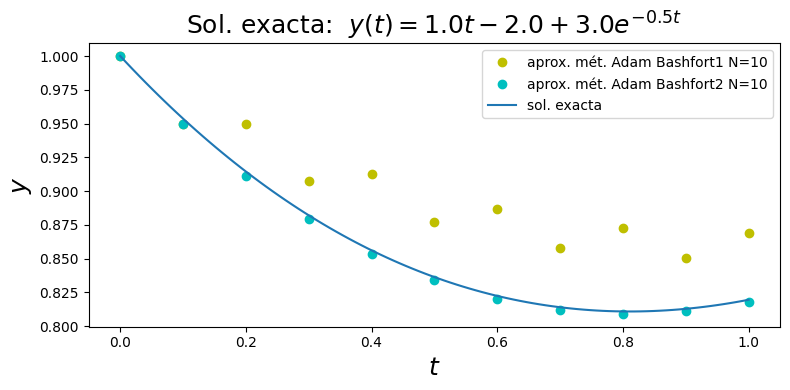

In [411]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(AdamBashfort1['xx'],AdamBashfort1['yy'], 'yo',label = "aprox. mét. Adam Bashfort1 N={}".format(N))
ax.plot(AdamBashfort2['xx'],AdamBashfort2['yy'], 'co',label = "aprox. mét. Adam Bashfort2 N={}".format(N))

ax.plot(xx, y_x(xx), label="sol. exacta")
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()

Me da error así que esto es lo que añadiría:

In [412]:
N = 10
errorABK3 = ['Error Adam-Bashfort 3']

AdamBashfort3 = {'xx': integrate3(f,a,ya,b,N)[0], 'yy': integrate3(f,a,ya,b,N)[1]}
errorABK3.append(max(abs(AdamBashfort3['yy']-y_x(AdamBashfort3['xx']))))

print(errorABK3)
ax.plot(AdamBashfort3['xx'],AdamBashfort3['yy'], 'co',label = "aprox. mét. Adam Bashfort3 N={}".format(N))

ValueError: operands could not be broadcast together with shapes (12,) (11,) 